## Imports

In [147]:
import matplotlib.pyplot as plt
import numpy as np

## Inputs

In [148]:
# Number of points to plot
num_pts = 20
# Launch angle in degrees: -180 <= theta_0_deg <= +180
theta_0_deg = 90
# Launch velocity magnitude: v_0 = ~100 is enough to reach top of plot area on vertical shot
v_0 = 100

## Constants

In [149]:
#
# Math constants
#
# Number of terms in cosine Taylor series approximation
n = 5
# pi approximation
PI = 3.141592654

#
# Physical parameters
#
# Gravitational acceleration in m/s^2
g = 9.8
# Initial position
x_0 = 0
y_0 = 0

# 
# Plot parameters
#
# Min and max values for axes
x_max = 1000
x_min = -x_max
y_max = 500
y_min = -y_max

## Math functions

In [150]:
# Cosine from Taylor series approximation
#   Assume -pi <= theta <= +pi, so no need to shift theta
#   Accuracy is improved if instead -pi/2 <= theta <= +pi/2
def cosine_n_terms(theta, n):
    # n = number of terms (not order)
    # 2(n-1) = order
    # cosine(theta) ~= ((-1)^n)*(theta^(2n))/(2n)!
    #               ~= 1 - theta^2/2! + theta^4/4! - theta^6/6! + ...
    cos_nth = 0

    for i in range(n):
        power_neg_one = (-1)**i
        power_theta = theta**(2*i)
        fact = np.math.factorial(2*i)   
        cos_nth += power_neg_one * power_theta / fact
    return cos_nth


# Cosine approximation:
#   Taylor series approximation is more accurate if -pi/2 <= theta_0 <= +pi/2. So:
#   If theta_0 is in 2nd/3rd quadrant:
#     (1) move angle to 1st/4th quadrant for cosine approximation
#     (2) force negative sign for cosine(theta_0)
#   (Use theta_0_deg for comparisons because calculated theta_0 in radians is slightly rounded)
#   Then call cosine_n_terms
def cosine_approx(theta_0, theta_0_deg, PI, n):
    if theta_0_deg >= 90:
        if theta_0_deg == 90:
            # If 90 degrees, use exact value of cos_theta_0
            cos_theta_0 = 0
        else:
            # If in 2nd quadrant, move to 1st, but force cos_theta_0 to be negative:
            theta_0 = PI - theta_0
            cos_theta_0 = -cosine_n_terms(theta_0, n)
    else:
        if theta_0_deg <= -90:
            if theta_0_deg == -90:
                # If -90 degrees, use exact value of cos_theta_0
                cos_theta_0 = 0
            else:
                # If in 3rd quadrant, move to 4th, but force cos_theta_0 to be negative:
                theta_0 = -PI - theta_0
                cos_theta_0 = -cosine_n_terms(theta_0, n)

        else:
            # If in 1st or 4th quadrant, all is good
            cos_theta_0 = cosine_n_terms(theta_0, n)

    return cos_theta_0


# Sine approximation: need to force correct signs
def sine_approx(theta_0, cos_theta_0):
    if theta_0 >= 0:
        # If theta_0 >= 0, then sin_theta_0 >= 0
        sin_theta_0 = (1 - cos_theta_0**2) ** 0.5
    else:
        # If theta_0 < 0, then sin_theta_0 < 0
        sin_theta_0 = -((1 - cos_theta_0**2) ** 0.5)

    return sin_theta_0

## Physics functions

In [151]:
# Time of projectile in plot area
def time_in_plot(theta_0_deg, x_0, y_0, x_min, x_max, y_min, v_0x, v_0y, g):  
    
    # Max time needed for y-direction
    t_max_y = (v_0y + (v_0y**2 - 2 * g * (y_min - y_0))**0.5) / g
    
    print ('t_max_y = ', t_max_y)

    #
    # Find max time needed for x_direction, t_max_x
    # Then t_max is minimum of t_max_x and t_max_y
    #
    # Check if abs(theta_0_deg) <, =, or > 90 degrees 
    #   (Use theta_0_deg for comparisons because calculated theta_0 in radians is slightly rounded)
    # Then find t_max_x, and then t_max
    if abs(theta_0_deg) <= 90:
        if abs(theta_0_deg) == 90:
            # abs(theta_0_deg) = 90, so v_0x = 0, so t_max_x = infinite, so
            t_max = t_max_y
        
            print ('t_max_x is ~infinite')
        
        else:
            # abs(theta_0_deg) < 90, so v_0x > 0, so projectile moves toward x_max
            t_max_x = (x_max - x_0) / v_0x      
            t_max = min(t_max_x, t_max_y)
            
            print ('t_max_x = ', t_max_x)
        
    else:
        # abs(theta_0_deg) > 90, so v_0x < 0, so projectile moves toward x_min
        t_max_x = (x_min - x_0) / v_0x
        t_max = min(t_max_x, t_max_y)
            
        print ('t_max_x = ', t_max_x)
    

    print ('t_max = ', t_max)
    
    return t_max

# Horizontal position
def x_value(x_0, v_0x, t):
    x = x_0 + v_0x * t
    return x

# Vertical position
def y_value(y_0, v_0y, g, t):
    y = y_0 + v_0y * t - 0.5 * g * t**2
    return y

## Projectile calculations

In [152]:
# Convert launch angle to radians
theta_0 = theta_0_deg * PI / 180
print ('theta_0 = ', theta_0)

# Trig function approximations
#   Don't use cos_theta_0 = cosine_n_terms(theta_0, n),
#   because results are bad near PI radians
cos_theta_0 = cosine_approx(theta_0, theta_0_deg, PI, n)
sin_theta_0 = sine_approx(theta_0, cos_theta_0)
    
# Initial velocity vector components
v_0x = v_0 * cos_theta_0
v_0y = v_0 * sin_theta_0

print ('v_0x = ', v_0x)
print ('v_0y = ', v_0y)

# Total time projectile remains in plot area
t_max = time_in_plot(theta_0_deg, x_0, y_0, x_min, x_max, y_min, v_0x, v_0y, g)    
    
# Time values array, evenly spaced
t_s = np.linspace(0, t_max, num_pts)

# Horizontal positions array
x_s = x_value(x_0, v_0x, t_s)   

# Vertical positions array
y_s = y_value(y_0, v_0y, g, t_s)

print ('x_s =', x_s)
print ('y_s =', y_s)

theta_0 =  1.570796327
v_0x =  0
v_0y =  100.0
t_max_y =  24.562497223949272
t_max_x is ~infinite
t_max =  24.562497223949272
x_s = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y_s = [   0.          121.08724378  225.79637275  314.12738691  386.08028627
  441.65507082  480.85174057  503.67029552  510.11073565  500.17306098
  473.85727151  431.16336723  372.09134815  296.64121426  204.81296556
   96.60660206  -27.97787625 -168.94046936 -326.28117728 -500.        ]


## Plot

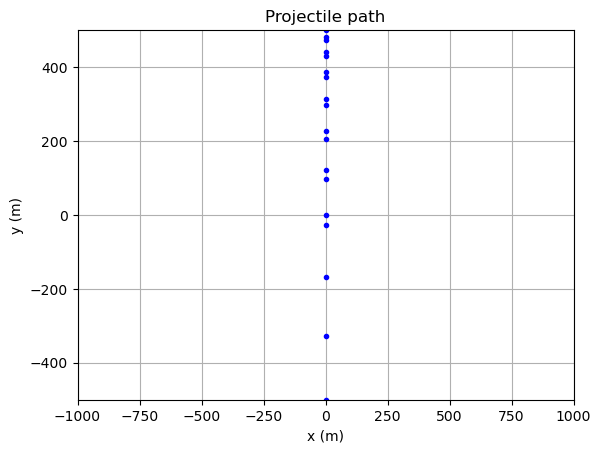

In [153]:
fig, ax = plt.subplots()

# Labels
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_title('Projectile path')

# Ranges of axes
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Grid lines
plt.grid()

ax.plot(x_s, y_s, 'b.')

plt.show()